### Always Printing out the Current Version of Python This Notebook Runs

In [1]:
import sys
print("Python Version is: " + sys.version)

Python Version is: 3.11.2 | packaged by Anaconda, Inc. | (main, Mar 27 2023, 23:35:04) [MSC v.1916 64 bit (AMD64)]


### Importing Libraries and Changing Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sns.set(color_codes = True)
#sns.set(style="whitegrid")
#sns.set_palette("Set3")

# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)

### Importing CSV dataset

In [3]:
# For Churn analysis
df = pd.read_csv("airline_passenger_satisfaction.csv") 

In [4]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


### Analyizing the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
# Reviewing the number of nulls
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [7]:
# all flyers are unique and didn't fly more than once in this survey
df['ID'].nunique()

129880

### Changing the text to a 1 and 0 for Satisfaction Column for "Target" on another algorithm

In [8]:
# Showing the data before changing it in the cell below
df['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [9]:
# Changing it where if Satisfaction is found, that equals 1. Everything else equals 0
df['Satisfaction'] = np.where(df['Satisfaction'] == "Satisfied", 1, 0)

### Reviewing the Values Before Transforming the Data

In [10]:
df['Satisfaction'].value_counts()

0    73452
1    56428
Name: Satisfaction, dtype: int64

In [11]:
df['Class'].value_counts()

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

In [12]:
df['Type of Travel'].value_counts()

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

In [13]:
df['Customer Type'].value_counts()

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

In [14]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

### One Hot Encoding on 4 Columns

In [15]:
columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class']#, 'Satisfaction']

In [16]:
#Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [17]:
# Overwriting the df with the one-hot encoded df
df=df_encoded

### Reviewing the stats on the missing values for Arrival Delay  

In [18]:
df['Arrival Delay'].mean()
df['Arrival Delay'].median()

15.09112883918849

0.0

### linear interpolation to fill missing values

In [19]:
# Perform linear interpolation to fill missing values with estimates based on the surrounding non-null values.
df['Arrival Delay'].interpolate(method='linear', inplace=True)

In [20]:
# Checking to make sure I see zero (0)
df['Arrival Delay'].isnull().sum()

0

### Saving a backup copy that isn't normalized

In [21]:
df2=df.copy()

In [22]:
df2.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,1,1,0,1,0,1,0,0
1,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,0,0,1,1,0,1,0,0
2,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,1,0,1,1,0,1,0,0
3,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,1,0,1,1,0,1,0,0
4,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,1,0,0,1,1,0,1,0,0


### Exporting Cleaned & Transformed DF

In [23]:
df2.to_csv('Cleaned DF\Cleaned_XGBoost_DF.csv', index=False)

### Data Normalization

In [24]:
from sklearn.preprocessing import StandardScaler

# Normalizing 
# No need to normalize binary or Likert Scaled columns. It's already standardized essentually.
columns_to_normalize = df.columns[1:5] 

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

### Exporting Normalized DF

In [25]:
df.to_csv('Cleaned DF\_Normalized_XGBoost_DF.csv', index=False)

### Why is there negative values after normalizing?
The negative values after normalizing using the StandardScaler are expected because this scaler performs standardization, which transforms the data to have a mean of zero and a standard deviation of one. The resulting values can be both positive and negative, depending on their original distribution.

The purpose of standardization is to scale the data to a standard normal distribution, where the mean is centered at zero and the standard deviation is 1. This normalization technique helps in cases where the absolute values or magnitudes of the features are not as important as their relative positions or distributions.

Negative values in the normalized data indicate that the original values were below the mean, while positive values indicate values above the mean. The magnitude of the values represents the number of standard deviations away from the mean.

### Why normalize age

Scale of the variable: Consider the scale of the "age" variable relative to other features in your dataset. If "age" is on a significantly different scale than other variables, normalization may help ensure that it is not disproportionately influencing the analysis or machine learning model due to its larger magnitude.

In [26]:
df.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,1,1,0,1,0,1,0,0
1,2,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,0,0,1,1,0,1,0,0
2,3,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,1,0,1,1,0,1,0,0
3,4,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,1,0,1,1,0,1,0,0
4,5,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,1,0,0,1,1,0,1,0,0


### Running it Through XGBoost for Clustering

In [27]:
columns_to_drop = ['ID','Satisfaction']
X = df.drop(columns_to_drop, axis=1)  # Features
y = df['Satisfaction']  # Target

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
import xgboost as xgb

#adding additional parameters to reduce the chance of overfitting. 
xgb_model = xgb.XGBClassifier(booster='gbtree',max_depth = 3,learning_rate=0.1,min_child_weight = 6, subsample = 0.5,
                             n_estimators = 200)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
# Predicting the target variable using the XGBoost model on the test data
y_pred = xgb_model.predict(X_test)

In [31]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
time_begin = time.time()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f'Run time: {round(((time.time()-time_begin)/60), 3)} mins')

Accuracy: 0.95
Precision: 0.96
Recall: 0.93
F1-Score: 0.94
Run time: 0.0 mins


### Creating a Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

<Figure size 1000x800 with 0 Axes>

<Axes: >

([<matplotlib.axis.XTick at 0x20409d077d0>,
 [Text(0.5, 0, 'Negative'), Text(1.5, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x20409cf42d0>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

Text(0.5, 58.7222222222222, 'Predicted')

Text(95.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

Text(0, 2, 'True Negative:    Predicted Negative\nActual Negative')

Text(0, 1, 'False Positive:   Predicted Positive\nActual Negative')

Text(1, 2, 'False Negative:   Predicted Negative\nActual Positive')

Text(1, 1, 'True Positive:    Predicted Positive\nActual Positive')

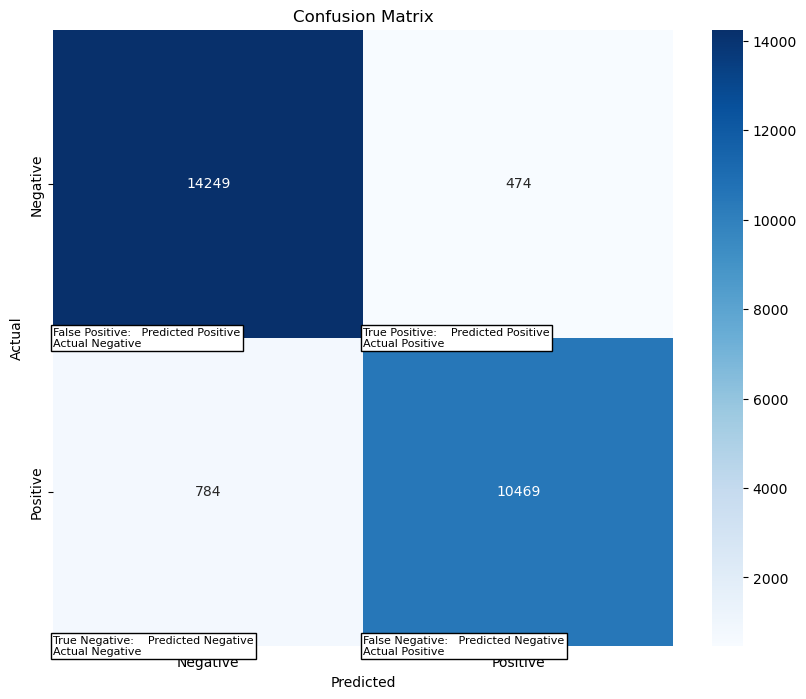

In [33]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')


# Adding labels to the confusion matrix squares
class_names = ['Negative', 'Positive']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Adding context to the confusion matrix
plt.text(0, 2, 'True Negative:    Predicted Negative\nActual Negative', fontsize=8, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2'))
plt.text(0, 1, 'False Positive:   Predicted Positive\nActual Negative', fontsize=8, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2'))
plt.text(1, 2, 'False Negative:   Predicted Negative\nActual Positive', fontsize=8, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2'))
plt.text(1, 1, 'True Positive:    Predicted Positive\nActual Positive', fontsize=8, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2'))


plt.show()

### GridSearchCV (Optimizations)

In [34]:
# This does take a while, not always worth it when testing things quickly. Comment out this block when needed
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 150, 200]
}

# Perform a grid search or random search to find the best combination of hyperparameters
xgb_classifier = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Train the XGBoost model with the best parameters
xgb_classifier = xgb.XGBClassifier(**best_params)
xgb_classifier.fit(X_train, y_train)

# Evaluate the model performance on the test set
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200]})

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy: 0.96
Precision: 0.97
Recall: 0.94
F1-Score: 0.96


### Feature Importance Attributes

Feature importance refers to a technique used in machine learning to determine the significance of each input feature in predicting the target variable. It provides a ranking or score for each feature, indicating its relative importance or contribution to the predictive power of the model.

In [35]:
import xgboost as xgb

# Train the XGBoost model with the best parameters
xgb_classifier = xgb.XGBClassifier(booster='gbtree',max_depth = 3,learning_rate=0.1,min_child_weight = 6, subsample = 0.5,
                             n_estimators = 200)
xgb_classifier.fit(X_train, y_train)

# Get the feature importance scores
feature_importance = xgb_classifier.feature_importances_

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importance table
print(importance_df)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

                                   Feature  Importance
7                          Online Boarding    0.300765
24                          Class_Business    0.139854
22                 Type of Travel_Business    0.100772
15                  In-flight Wifi Service    0.067950
16                 In-flight Entertainment    0.063865
11                        Leg Room Service    0.049058
6                         Check-in Service    0.046128
20                Customer Type_First-time    0.042331
9                         On-board Service    0.035012
10                            Seat Comfort    0.022724
17                        Baggage Handling    0.019988
12                             Cleanliness    0.019663
14                       In-flight Service    0.018393
3                            Arrival Delay    0.017437
8                            Gate Location    0.011977
4   Departure and Arrival Time Convenience    0.009147
0                                      Age    0.008880
25        

In [36]:
df.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,1,1,0,1,0,1,0,0
1,2,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,0,0,1,1,0,1,0,0
2,3,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,1,0,1,1,0,1,0,0
3,4,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,1,0,1,1,0,1,0,0
4,5,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,1,0,0,1,1,0,1,0,0


### Adding the target variable and the prediction back into the original dataframe

In [37]:
df['Satisfaction'] = y


In [38]:
df['Churn_Prediction'] = np.nan
df = df.merge(pd.DataFrame({'Churn_Prediction': y_pred}), how='left', left_index=True, right_index=True)



In [39]:
df['Prediction_Match'] = np.where(df['Churn_Prediction_y'].isnull(), np.nan,
                                  np.where(df['Churn_Prediction_y'] == df['Satisfaction'], 'Match', 'Mismatch'))

In [40]:
df=df.drop(['Churn_Prediction_x'], axis=1)

In [41]:
df.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Churn_Prediction_y,Prediction_Match
0,1,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,1,1,0,1,0,1,0,0,0.0,Match
1,2,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,0,0,1,1,0,1,0,0,1.0,Match
2,3,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,1,0,1,1,0,1,0,0,1.0,Match
3,4,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,1,0,1,1,0,1,0,0,0.0,Mismatch
4,5,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,1,0,0,1,1,0,1,0,0,1.0,Match


### Adding the target variable and the prediction back into the second (non-normalized) dataframe

In [42]:
df2['Satisfaction'] = y


In [43]:
df2['Churn_Prediction'] = np.nan
df2 = df2.merge(pd.DataFrame({'Churn_Prediction': y_pred}), how='left', left_index=True, right_index=True)



In [44]:
# Adding a new column called Prediction Match and based on if it matches or not, it will say "Match" or "Mismatch"
df2['Prediction_Match'] = np.where(df2['Churn_Prediction_y'].isnull(), np.nan,
                                  np.where(df2['Churn_Prediction_y'] == df2['Satisfaction'], 'Match', 'Mismatch'))

In [45]:
df2=df2.drop(['Churn_Prediction_x'], axis=1)

In [46]:
df2.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Churn_Prediction_y,Prediction_Match
0,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,1,1,0,1,0,1,0,0,0.0,Match
1,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,0,0,1,1,0,1,0,0,1.0,Match
2,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,1,0,1,1,0,1,0,0,1.0,Match
3,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,1,0,1,1,0,1,0,0,0.0,Mismatch
4,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,1,0,0,1,1,0,1,0,0,1.0,Match


### Exporting Predictions to the non-normalized DF

In [47]:
df2.to_csv('Cleaned DF\Predictions_OG_XGBoost_DF.csv', index=False)

### Exporting Predictions to the original DF

In [48]:
df.to_csv('Cleaned DF\Predictions_XGBoost_DF.csv', index=False)

### Saving my model

In [49]:
import pickle

# Assuming `model` is your trained model object
# Specify the desired file path and name for the saved model
file_path = 'Saved_Models\XGBoost_model.pkl'

# Save the model using pickle
with open(file_path, 'wb') as file:
    pickle.dump(xgb_model, file)


# Done